In [186]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [201]:
# Create a random weighted graph
num_nodes = 5
probability = 1
graph = nx.fast_gnp_random_graph(num_nodes, probability)

# Assign random weights to the edges
for (u, v) in graph.edges():
    graph.edges[u, v]['weight'] = np.random.uniform(0.1, 1.0)

# Get the weighted adjacency matrix
adjacency_matrix = nx.to_numpy_array(graph, weight='weight')

# Print the weighted adjacency matrix
print(adjacency_matrix)

# Generate and save the positions using spring_layout



[[0.         0.83358166 0.62497204 0.87683766 0.66022771]
 [0.83358166 0.         0.17106368 0.65936093 0.53001455]
 [0.62497204 0.17106368 0.         0.10168816 0.81130214]
 [0.87683766 0.65936093 0.10168816 0.         0.38772892]
 [0.66022771 0.53001455 0.81130214 0.38772892 0.        ]]


In [217]:
pos = nx.spiral_layout(graph)
with open('positions.pkl', 'wb') as f:
    pickle.dump(pos, f)


<ipython-input-249-6345820aea94>:9: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


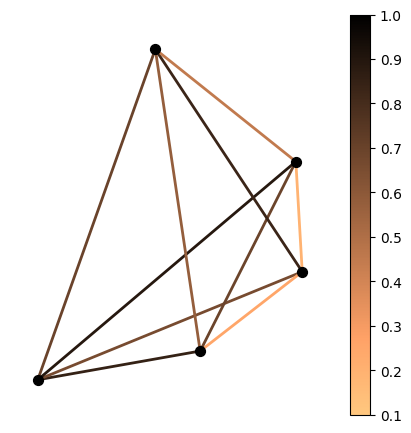

In [249]:
# Draw the graph with edge colors based on weights
plt.figure(figsize=(4, 4))
edges = graph.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]
nx.draw(graph, pos, with_labels=False, node_color='k', node_size=50, edge_color=weights, edge_cmap=plt.cm.copper_r, width=2, edge_vmin=0, edge_vmax=1.0)
plt.box(True)
sm = plt.cm.ScalarMappable(cmap=plt.cm.copper_r, norm=plt.Normalize(vmin=0.1, vmax=1.0))
# sm.set_array([])
plt.colorbar(sm)
plt.show()

In [219]:
from gtda.homology import VietorisRipsPersistence
import gudhi as gd

In [220]:
VR=VietorisRipsPersistence(metric='precomputed',homology_dimensions=[0,1],n_jobs=-1)

In [222]:
THs=A[0][:,1]

In [242]:
THs=[0.2,0.54,0.7,0.9]

In [243]:
Gs=[]
for th in THs:
  # fig,ax=plt.subplots(ncols=1,figsize=(8,8),dpi=100);
  # ax.set_title(r'$\vartheta =${:.2f}'.format(th))
  G=graph.copy()
  G.remove_edges_from([(n1, n2) for n1, n2, w in G.edges(data="weight") if w > th])
  edges = G.edges(data=True)
  weights = [edge[2]['weight'] for edge in edges]
  Gs.append(G)
  # nx.draw(G, pos,ax=ax,with_labels=False, node_color='k', node_size=75, edge_color='gray', edge_cmap=plt.cm.copper_r, width=2, edge_vmin=0, edge_vmax=1.0);
  # plt.savefig('{:.2f}.jpg'.format(th))
  # plt.show()

In [ ]:
axes['A']=tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

In [255]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [276]:
THs

[0.2, 0.54, 0.7, 0.9]

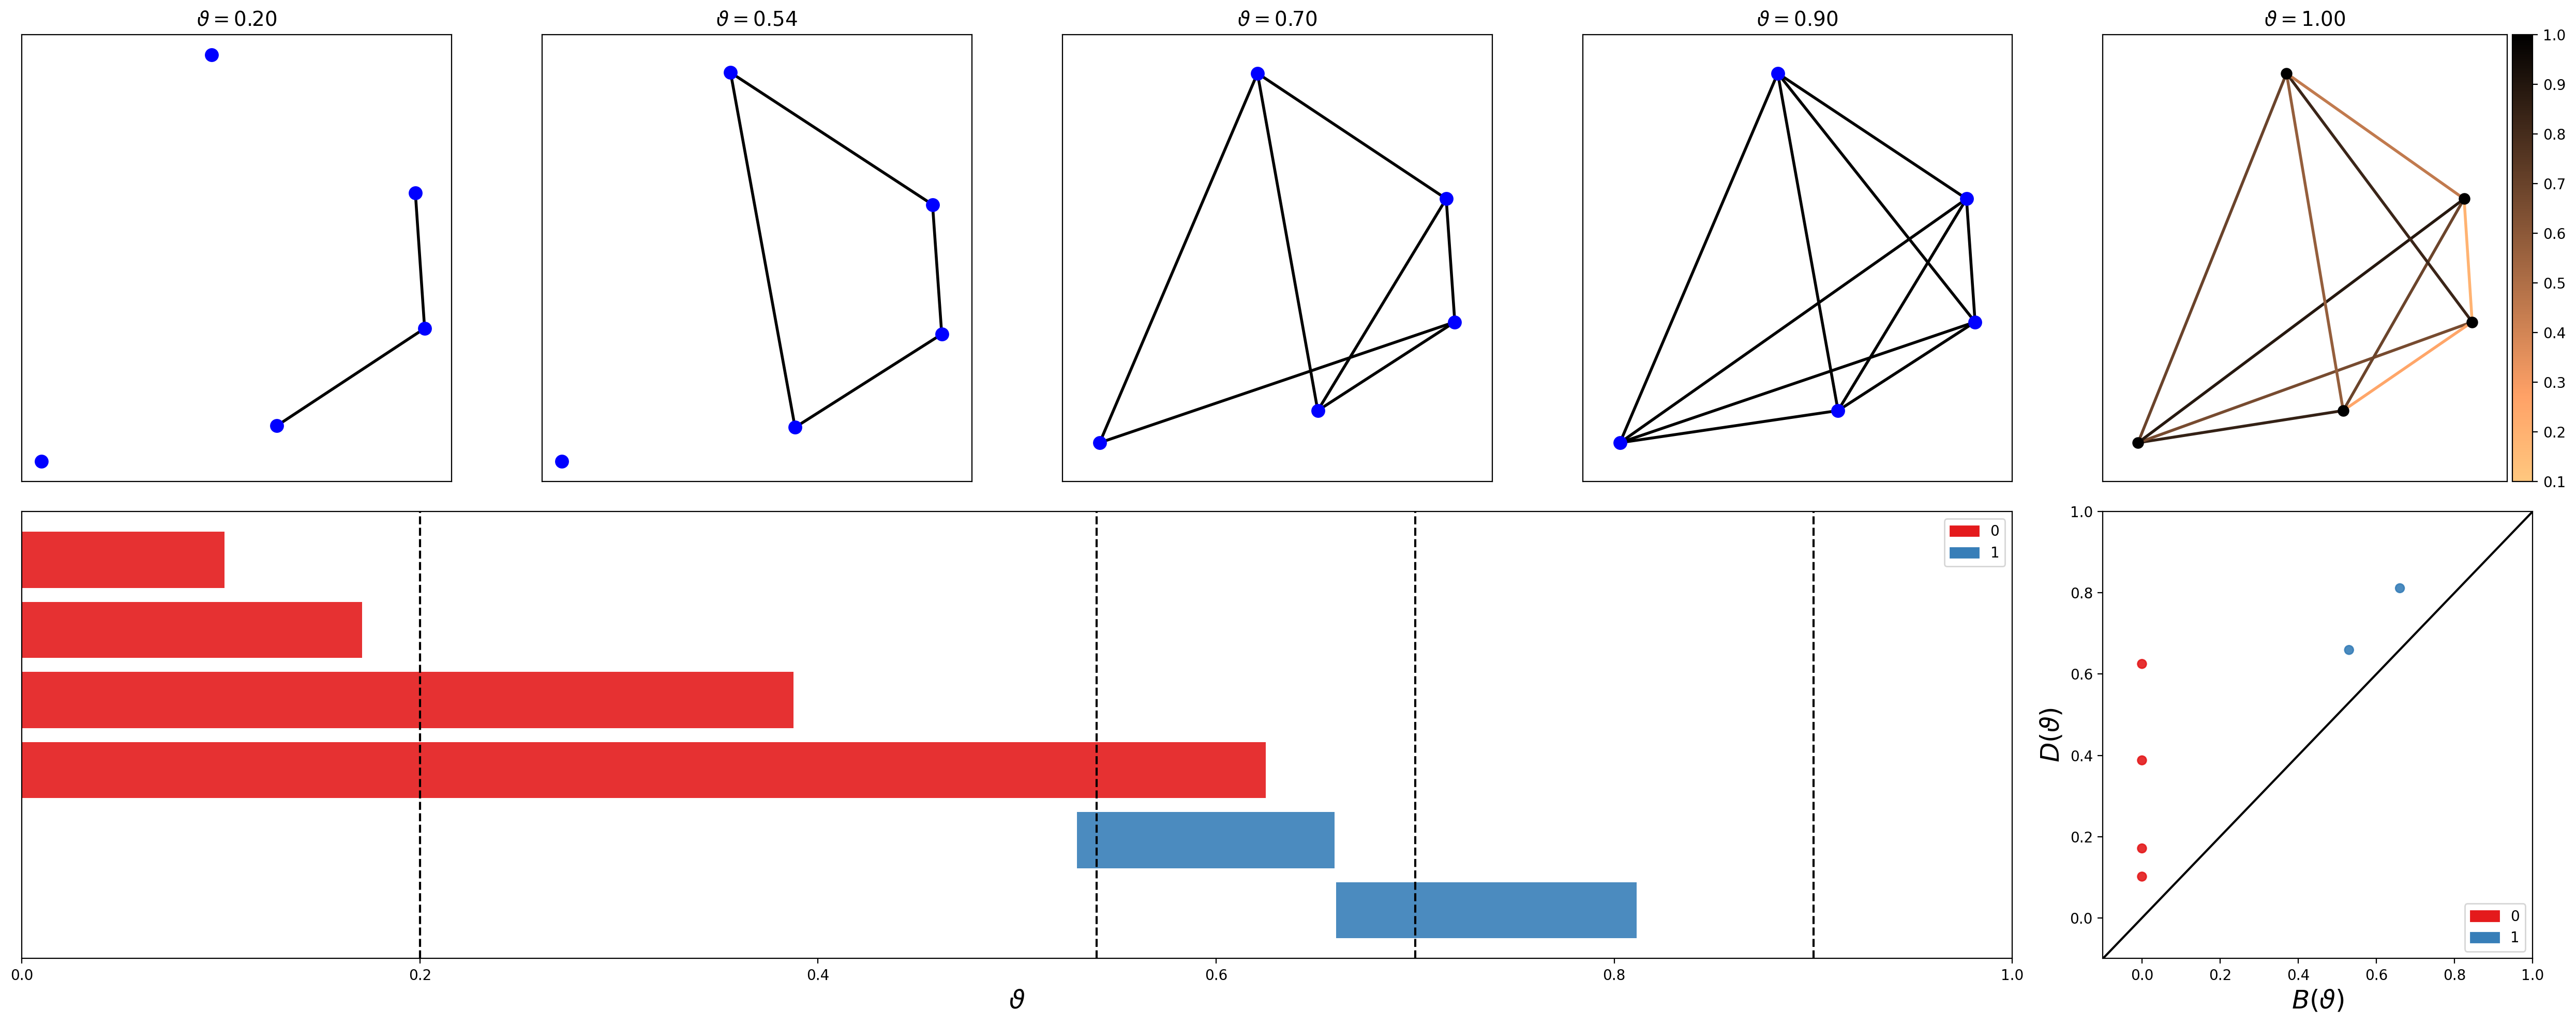

In [290]:
G=nx.to_numpy_array(graph, weight='weight')
G[G==0]=np.inf
np.fill_diagonal(G,0)
A=VR.fit_transform([G])
gudhi_diagram = [(int(dim), (b, d)) for b, d, dim in A[0]] # Cast dim to an integer

fig, axes = plt.subplot_mosaic("ABCDE;FFFFG",figsize=(25,10),dpi=200)

gd.plot_persistence_diagram(gudhi_diagram,axes=axes['G'],greyblock=False,alpha=0.9,fontsize=10);
gd.plot_persistence_barcode(gudhi_diagram,axes=axes['F'],alpha=0.9,legend=True)

axes['G'].set_ylim(-.1,1)
axes['G'].set_xlim(-.1,1)
axes['F'].set_xlim(0,1)
axes['F'].set_xlabel(r'$\vartheta$',fontsize=18)
axes['G'].set_xlabel(r'$B(\vartheta$)',fontsize=18)
axes['G'].set_ylabel(r'$D(\vartheta)$',fontsize=18)
axes['G'].plot(np.linspace(-.1,1,200),np.linspace(-.1,1,200),'k-',alpha=1)

axes['F'].axvline(x = THs[0], color = 'k',linestyle='--')
axes['F'].axvline(x = THs[1], color = 'k',linestyle='--')
axes['F'].axvline(x = THs[2], color = 'k',linestyle='--')
axes['F'].axvline(x = THs[3], color = 'k',linestyle='--')
axes['F'].set_title('')
axes['G'].set_title('')

axes['A'].set_title(r'$\vartheta = 0.20$',fontsize=14)
nx.draw(Gs[0], pos,ax=axes['A'],with_labels=False, node_color='b', node_size=75, edge_color='k', edge_cmap=plt.cm.copper_r, width=2, edge_vmin=0, edge_vmax=1.0,alpha=1)
axes['A'].axis('on')

axes['B'].set_title(r'$\vartheta = 0.54$',fontsize=14)
nx.draw(Gs[1], pos,ax=axes['B'],with_labels=False, node_color='b', node_size=75, edge_color='k', edge_cmap=plt.cm.copper_r, width=2, edge_vmin=0, edge_vmax=1.0,alpha=1)
axes['B'].axis('on')

axes['C'].set_title(r'$\vartheta = 0.70$',fontsize=14)
nx.draw(Gs[2], pos,ax=axes['C'],with_labels=False, node_color='b', node_size=75, edge_color='k', edge_cmap=plt.cm.copper_r, width=2, edge_vmin=0, edge_vmax=1.0,alpha=1)
axes['C'].axis('on')

axes['D'].set_title(r'$\vartheta = 0.90$',fontsize=14)
nx.draw(Gs[3], pos,ax=axes['D'],with_labels=False, node_color='b', node_size=75, edge_color='k', edge_cmap=plt.cm.copper_r, width=2, edge_vmin=0, edge_vmax=1.0,alpha=1)
axes['D'].axis('on')

axes['E'].set_title(r'$\vartheta = 1.00$',fontsize=14)
edges = graph.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]
nx.draw(graph, pos,ax=axes['E'], with_labels=False, node_color='k', node_size=50, edge_color=weights, edge_cmap=plt.cm.copper_r, width=2, edge_vmin=0, edge_vmax=1.0)
divider = make_axes_locatable(axes['E'])
cax = divider.append_axes('right', size='5%', pad=0.05)
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.copper_r, norm=plt.Normalize(vmin=0.1, vmax=1.0)),cax=cax)
axes['E'].axis('on')
plt.tight_layout()
plt.savefig('1.png')